## DFO Nutrient Comparison

sal, temp, nit - not by cluster


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
from collections import OrderedDict

mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble =r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

%matplotlib inline

In [67]:
# PATH= '/results2/SalishSea/nowcast-green.201905/'
# start_date = dt.datetime(2013,1,1)
# end_date = dt.datetime(2018,1,1)
# flen=1
# namfmt='nowcast'
# #varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
# filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
# #gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
# fdict={'ptrc_T':1,'grid_T':1}
# saveloc='/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/TJCluster/pkls/'
# saveloc = '/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/'
# fname=f'data_DFOBot_HC1905_{start_date.strftime("%Y%m%d")}_{end_date.strftime("%Y%m%d")}.pkl'
# print(fname)
# rematch=False
# if rematch==True:
#     df1=et.loadDFO()
#     df1.head()
#     data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
#     pickle.dump(data,open(os.path.join(saveloc,fname),'wb'))
# else:
#     data=pickle.load(open(os.path.join(saveloc,fname),'rb'))

In [68]:
data = \
pd.read_csv('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO_2013-01-01_2017-01-01_HC1905.csv')

In [69]:
mod_chl_N=1.6
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [70]:
display(list(data.columns.values))

['Year',
 'Month',
 'Day',
 'Hour',
 'Lat',
 'Lon',
 'Pressure',
 'Depth',
 'Ammonium',
 'Ammonium_units',
 'Chlorophyll_Extracted',
 'Chlorophyll_Extracted_units',
 'N',
 'Si',
 'Silicate_units',
 'AbsSal',
 'ConsT',
 'Z',
 'dtUTC',
 'j',
 'i',
 'mod_nitrate',
 'mod_silicon',
 'mod_ammonium',
 'mod_diatoms',
 'mod_ciliates',
 'mod_flagellates',
 'mod_vosaline',
 'mod_votemper',
 'k',
 'l10_obsChl',
 'l10_modChl',
 'mod_Chl']

In [71]:
cver = "BIO"
clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
cfile = {2013:"BIO_clno_5_2013_reass.pkl",2014:"BIO_clno_5_2014_reass.pkl", 
         2015: "BIO_clno_5_2015_reass.pkl", 2016: "BIO_clno_5_2016_reass.pkl"}
cxf='Xcoords_for571_stations.pkl'
cyf='Ycoords_for571_stations.pkl'
print('Cluster version is:', cver)
# papermill reads dictionary keys as strings, so add code to correct this
cfile2=dict()
for key,val in cfile.items():
    cfile2[int(key)]=val
cfile=cfile2
cx=pickle.load(open(clusterD+cxf, 'rb'))
cy=pickle.load(open(clusterD+cyf, 'rb'))
cf=dict()
for iyear in cfile.keys():
    cf[iyear]=pickle.load(open(clusterD+cfile[iyear],'rb'))

def round2(num):
    return int(np.trunc((num+2)/10)*10+2)

data['Cluster']=np.zeros(len(data))
for ir, row in data.iterrows():
    ii=(cx==round2(row['i']))&(cy==round2(row['j']))
    if sum(ii)==1:
        cluster=cf[row['Year']][ii]
        data.at[ir,'Cluster']=int(cluster)
        
groups=pd.read_csv('/data/eolson/results/MEOPAR/clusterGroups/cluster_consolidated.csv')
cset0=set([(ii,jj) for ii,jj in groups.loc[:,['I','j']].values])
pdlist=list()
cset1=set()
for i,row in groups.iterrows():
    for ii in range(-5,5):
        for jj in range(-5,5):
            if not (row['I']+ii,row['j']+jj) in cset0|cset1:
                pdlist.append((row['I']+ii,row['j']+jj,row['Cluster_ID']))
                cset1.add((row['I']+ii,row['j']+jj))
newpd=pd.DataFrame(columns=['I', 'j', 'Cluster_ID'],data=pdlist)
data2=pd.merge(data,pd.concat((newpd,groups)),how='inner',left_on=['i','j'],right_on=['I','j'])

Cluster version is: BIO


In [72]:
display(list(data.columns.values))

['Year',
 'Month',
 'Day',
 'Hour',
 'Lat',
 'Lon',
 'Pressure',
 'Depth',
 'Ammonium',
 'Ammonium_units',
 'Chlorophyll_Extracted',
 'Chlorophyll_Extracted_units',
 'N',
 'Si',
 'Silicate_units',
 'AbsSal',
 'ConsT',
 'Z',
 'dtUTC',
 'j',
 'i',
 'mod_nitrate',
 'mod_silicon',
 'mod_ammonium',
 'mod_diatoms',
 'mod_ciliates',
 'mod_flagellates',
 'mod_vosaline',
 'mod_votemper',
 'k',
 'l10_obsChl',
 'l10_modChl',
 'mod_Chl',
 'Cluster']

In [73]:
def rotmap(lon,lat,lon0,lat0,phi):
    # rotate around point (pick one near center of domain)
    # phi in degrees
    # first scale lats to match and center around lat0,lon0:
    lon1=(lon-lon0)*np.cos(lat0*np.pi/180)
    lat1=lat-lat0
    # now rotate:
    lon2=lon1*np.cos(phi*np.pi/180)-lat1*np.sin(phi*np.pi/180)
    lat2=lon1*np.sin(phi*np.pi/180)+lat1*np.cos(phi*np.pi/180)
    return lon2,lat2

In [74]:
cm1=cmocean.cm.thermal
#plt.get_cmap('PuBuGn')
#cm1=cmo.cm.matter
theta=-30
lon0=-123.9
lat0=49.3
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])
blon,blat=rotmap(bathylon,bathylat,lon0,lat0,theta)

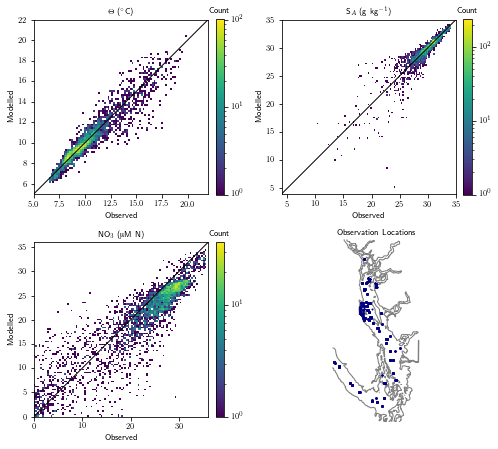

In [75]:
fig = plt.figure(figsize = (7,6.3))
gsv = gridspec.GridSpec(2,2,left=.08,right=.95,bottom=.05,top=.95,
                        hspace=.2,wspace=.3)
#gs1=gridspec.GridSpecFromSubplotSpec(3,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
#                                     height_ratios=[1,1,1],width_ratios=[1,1,1,.1,.1])
axT=fig.add_subplot(gsv[0,0])
axS = fig.add_subplot(gsv[0,1])
axN = fig.add_subplot(gsv[1,0])
axM= fig.add_subplot(gsv[1,1])

iiT=(~np.isnan(data['ConsT']))&(~np.isnan(data['mod_votemper']))
iiS=(~np.isnan(data['AbsSal']))&(~np.isnan(data['mod_vosaline']))
iiN=(~np.isnan(data['N']))&(~np.isnan(data['mod_nitrate']))
counts, xedges, yedges, m1=axT.hist2d(data.loc[iiT,['ConsT']].values.flatten(),
                                      data.loc[iiT,['mod_votemper']].values.flatten(),bins=25*3,norm=LogNorm())
counts, xedges, yedges, m2=axS.hist2d(data.loc[iiS,['AbsSal']].values.flatten(),
                                      data.loc[iiS,['mod_vosaline']].values.flatten(),bins=36*3,norm=LogNorm())
counts, xedges, yedges, m3=axN.hist2d(data.loc[iiN,['N']].values.flatten(),
                                      data.loc[iiN,['mod_nitrate']].values.flatten(),bins=36*3,norm=LogNorm())
for iax in (axT,axS,axN):
    iax.set_aspect(1)
    iax.set_ylabel('Modelled')
    iax.set_xlabel('Observed')
axT.set_title('$\Theta$ ($^{\circ}$C)')
Tlims=[5,22]
axT.set_xlim(Tlims)
axT.set_ylim(Tlims)
axT.plot(Tlims,Tlims,'k-',lw=1)
axS.set_title('S$_A$ (g kg$^{-1}$)')
Slims=[4,35]
axS.set_xlim(Slims)
axS.set_ylim(Slims)
axS.plot(Slims,Slims,'k-',lw=1)
axN.set_title('NO$_3$ ($\muup$M N)')
Nlims=[0,36]
axN.set_xlim(Nlims)
axN.set_ylim(Nlims)
axN.plot(Nlims,Nlims,'k-',lw=1)
cbT=fig.colorbar(m1,ax=axT,fraction=0.046, pad=0.04)
cbS=fig.colorbar(m2,ax=axS,fraction=0.046, pad=0.04)
cbN=fig.colorbar(m3,ax=axN,fraction=0.046, pad=0.04)
for iax in (cbT,cbS,cbN):
    iax.ax.set_title('Count')
    
axM.set_aspect(1, adjustable='box')
contour_lines = axM.contour(blon,blat,bathyZ,[1e-5],
            colors='gray',linewidths=1,zorder=2,)
axM.set_xlim(-1.02,0.81)
axM.set_ylim(-1.5,1.8)
axM.axis('off')

lonsT,latsT=rotmap(data.loc[iiT,['Lon']].values.flatten(), data.loc[iiT,['Lat']].values.flatten(),lon0,lat0,theta)
axM.plot(lonsT,latsT,
         '.',color='navy',markersize=2)
axM.annotate('Observation Locations',xy=[.5,1.01],xycoords='axes fraction',ha='center',fontsize=8)
fig.savefig('eval_2013_2017_HC1905.png',dpi=300)

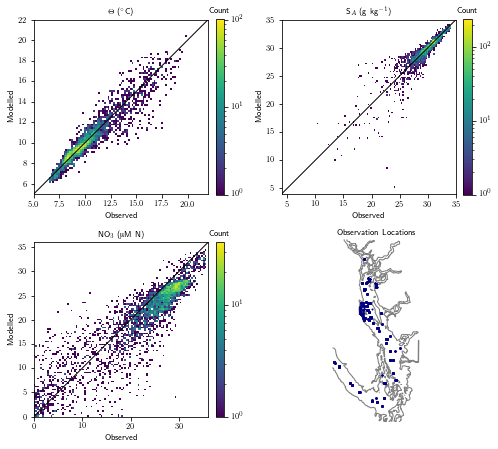

In [76]:
fig = plt.figure(figsize = (7,6.3))
gsv = gridspec.GridSpec(2,2,left=.08,right=.95,bottom=.05,top=.95,
                        hspace=.2,wspace=.3)
#gs1=gridspec.GridSpecFromSubplotSpec(3,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
#                                     height_ratios=[1,1,1],width_ratios=[1,1,1,.1,.1])
axT=fig.add_subplot(gsv[0,0])
axS = fig.add_subplot(gsv[0,1])
axN = fig.add_subplot(gsv[1,0])
axM= fig.add_subplot(gsv[1,1])

iiT=(~np.isnan(data['ConsT']))&(~np.isnan(data['mod_votemper']))
iiS=(~np.isnan(data['AbsSal']))&(~np.isnan(data['mod_vosaline']))
iiN=(~np.isnan(data['N']))&(~np.isnan(data['mod_nitrate']))
counts, xedges, yedges, m1=axT.hist2d(data.loc[iiT,['ConsT']].values.flatten(),
                                      data.loc[iiT,['mod_votemper']].values.flatten(),bins=25*3,norm=LogNorm())
counts, xedges, yedges, m2=axS.hist2d(data.loc[iiS,['AbsSal']].values.flatten(),
                                      data.loc[iiS,['mod_vosaline']].values.flatten(),bins=36*3,norm=LogNorm())
counts, xedges, yedges, m3=axN.hist2d(data.loc[iiN,['N']].values.flatten(),
                                      data.loc[iiN,['mod_nitrate']].values.flatten(),bins=36*3,norm=LogNorm())
for iax in (axT,axS,axN):
    iax.set_aspect(1)
    iax.set_ylabel('Modelled')
    iax.set_xlabel('Observed')
axT.set_title('$\Theta$ ($^{\circ}$C)')
Tlims=[5,22]
axT.set_xlim(Tlims)
axT.set_ylim(Tlims)
axT.plot(Tlims,Tlims,'k-',lw=1)
axS.set_title('S$_A$ (g kg$^{-1}$)')
Slims=[4,35]
axS.set_xlim(Slims)
axS.set_ylim(Slims)
axS.plot(Slims,Slims,'k-',lw=1)
axN.set_title('NO$_3$ ($\muup$M N)')
Nlims=[0,36]
axN.set_xlim(Nlims)
axN.set_ylim(Nlims)
axN.plot(Nlims,Nlims,'k-',lw=1)
cbT=fig.colorbar(m1,ax=axT,fraction=0.046, pad=0.04)
cbS=fig.colorbar(m2,ax=axS,fraction=0.046, pad=0.04)
cbN=fig.colorbar(m3,ax=axN,fraction=0.046, pad=0.04)
for iax in (cbT,cbS,cbN):
    iax.ax.set_title('Count')
    
axM.set_aspect(1, adjustable='box')
contour_lines = axM.contour(blon,blat,bathyZ,[1e-5],
            colors='gray',linewidths=1,zorder=2,)
axM.set_xlim(-1.02,0.81)
axM.set_ylim(-1.5,1.8)
axM.axis('off')

lonsT,latsT=rotmap(data.loc[iiT,['Lon']].values.flatten(), data.loc[iiT,['Lat']].values.flatten(),lon0,lat0,theta)
axM.plot(lonsT,latsT,
         '.',color='navy',markersize=2)
axM.annotate('Observation Locations',xy=[.5,1.01],xycoords='axes fraction',ha='center',fontsize=8)
fig.savefig('eval_2013_2017_HC1905.png',dpi=300)

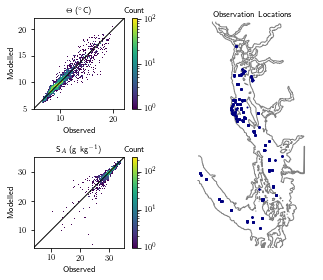

In [77]:
fig = plt.figure()
axT = plt.subplot2grid((2, 2), (0, 0), colspan=1)
axS = plt.subplot2grid((2, 2), (1, 0), colspan=1)
axM = plt.subplot2grid((2, 2), (0, 1), rowspan=2)



iiT=(~np.isnan(data['ConsT']))&(~np.isnan(data['mod_votemper']))
iiS=(~np.isnan(data['AbsSal']))&(~np.isnan(data['mod_vosaline']))
iiN=(~np.isnan(data['N']))&(~np.isnan(data['mod_nitrate']))
counts, xedges, yedges, m1=axT.hist2d(data.loc[iiT,['ConsT']].values.flatten(),
                                      data.loc[iiT,['mod_votemper']].values.flatten(),bins=25*3,norm=LogNorm())
counts, xedges, yedges, m2=axS.hist2d(data.loc[iiS,['AbsSal']].values.flatten(),
                                      data.loc[iiS,['mod_vosaline']].values.flatten(),bins=36*3,norm=LogNorm())
counts, xedges, yedges, m3=axN.hist2d(data.loc[iiN,['N']].values.flatten(),
                                      data.loc[iiN,['mod_nitrate']].values.flatten(),bins=36*3,norm=LogNorm())
for iax in (axT,axS,axN):
    iax.set_aspect(1)
    iax.set_ylabel('Modelled')
    iax.set_xlabel('Observed')
axT.set_title('$\Theta$ ($^{\circ}$C)')
Tlims=[5,22]
axT.set_xlim(Tlims)
axT.set_ylim(Tlims)
axT.plot(Tlims,Tlims,'k-',lw=1)
axS.set_title('S$_A$ (g kg$^{-1}$)')
Slims=[4,35]
axS.set_xlim(Slims)
axS.set_ylim(Slims)
axS.plot(Slims,Slims,'k-',lw=1)
axN.set_title('NO$_3$ ($\muup$M N)')
Nlims=[0,36]
axN.set_xlim(Nlims)
axN.set_ylim(Nlims)
axN.plot(Nlims,Nlims,'k-',lw=1)
cbT=fig.colorbar(m1,ax=axT,fraction=0.046, pad=0.04)
cbS=fig.colorbar(m2,ax=axS,fraction=0.046, pad=0.04)
cbN=fig.colorbar(m3,ax=axN,fraction=0.046, pad=0.04)
for iax in (cbT,cbS,cbN):
    iax.ax.set_title('Count')
    
axM.set_aspect(1, adjustable='box')
contour_lines = axM.contour(blon,blat,bathyZ,[1e-5],
            colors='gray',linewidths=1,zorder=2,)
axM.set_xlim(-1.02,0.81)
axM.set_ylim(-1.5,1.8)
axM.axis('off')
plt.tight_layout()
lonsT,latsT=rotmap(data.loc[iiT,['Lon']].values.flatten(), data.loc[iiT,['Lat']].values.flatten(),lon0,lat0,theta)
axM.plot(lonsT,latsT,
         '.',color='navy',markersize=2)
axM.annotate('Observation Locations',xy=[.5,1.01],xycoords='axes fraction',ha='center',fontsize=8)
fig.savefig('./figs/PHYS_eval_2013_2017_HC1905.png',dpi=300)

In [78]:
data['dtUTC'] = pd.to_datetime(data['dtUTC'], format="%Y-%m-%d %H:%M:%S")


<ipython-input-100-1e9ad5804821>:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


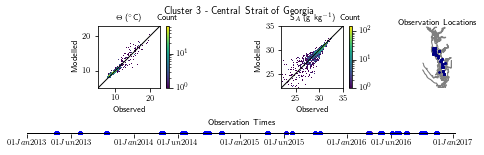

In [100]:
cl = 3
clnam = 'Central Strait of Georgia'
Slims=[22,35]
Tlims=[5,23]


fig = plt.figure(figsize = (7,2.))
gsv = gridspec.GridSpec(2,1,left=.08,right=.98,hspace=1.3,bottom=.1,top=.85,height_ratios=[4,.2])
gs1=gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec=gsv[0],wspace=.3,hspace=.34,
                                     width_ratios=[1,1,.6])
axT = fig.add_subplot(gs1[0])
axS = fig.add_subplot(gs1[1])
#axChl = fig.add_subplot(gs1[2])
axM = fig.add_subplot(gs1[-1])

axL=fig.add_subplot(gsv[1])



iiT=(~np.isnan(data['ConsT']))&(~np.isnan(data['mod_votemper']) & (data['Cluster'] == cl))
iiS=(~np.isnan(data['AbsSal']))&(~np.isnan(data['mod_vosaline']) & (data['Cluster'] == cl))

counts, xedges, yedges, m1=axT.hist2d(data.loc[iiT,['ConsT']].values.flatten(),
                                      data.loc[iiT,['mod_votemper']].values.flatten(),bins=25*3,norm=LogNorm())
counts, xedges, yedges, m2=axS.hist2d(data.loc[iiS,['AbsSal']].values.flatten(),
                                      data.loc[iiS,['mod_vosaline']].values.flatten(),bins=36*3,norm=LogNorm())
# counts, xedges, yedges, m3=axN.hist2d(data.loc[iiN,['N']].values.flatten(),
#                                       data.loc[iiN,['mod_nitrate']].values.flatten(),bins=36*3,norm=LogNorm())

cbT=fig.colorbar(m1,ax=axT,fraction=0.046, pad=0.04)
cbS=fig.colorbar(m2,ax=axS,fraction=0.046, pad=0.04)
# cbN=fig.colorbar(m3,ax=axN,fraction=0.046, pad=0.04)

axL.set_title('Observation Times',fontsize=8)
w = np.shape(data.loc[iiT,['dtUTC']].values.flatten()) 
w2 = np.shape(data.loc[iiS,['dtUTC']].values.flatten()) 

axL.plot(data.loc[iiS,['dtUTC']].values.flatten(),np.zeros(w2),'.',color='red',markersize=6,label='2015')
axL.plot(data.loc[iiT,['dtUTC']].values.flatten(),np.zeros(w),'.',color='blue',markersize=6,label='2015')


axL.xaxis.set_ticks([dt.datetime(2013,1,1), dt.datetime(2013,6,1),
                     dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                     dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                     dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                     dt.datetime(2017,1,1)])
labels=axL.xaxis.get_ticklabels()

axL.set_yticks(());
yearsFmt = mdates.DateFormatter('%d %b %Y')
axL.xaxis.set_major_formatter(yearsFmt)

axL.xaxis.set_ticks([dt.datetime(2013,1,1), dt.datetime(2013,6,1),
                     dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                     dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                     dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                     dt.datetime(2017,1,1)])
labels=axL.xaxis.get_ticklabels()
for tick in axL.get_xticklabels():
       #tick.set_rotation(50)
    tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.3)
axLpos=axL.get_position()
new = mpl.transforms.Bbox.from_bounds(axLpos.bounds[0],axLpos.bounds[1],axLpos.bounds[2]-.05,axLpos.bounds[3])
axL.set_position(new)
#axL.legend(handles=[p1,p2,p3],loc=8,ncol=3,bbox_to_anchor=[.5,-4])
axL.set_frame_on(False)

xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))


for iax in (axT,axS):
    iax.set_aspect(1)
    iax.set_ylabel('Modelled')
    iax.set_xlabel('Observed')
axT.set_title('$\Theta$ ($^{\circ}$C)')

axT.set_xlim(Tlims)
axT.set_ylim(Tlims)
axT.plot(Tlims,Tlims,'k-',lw=1)
axS.set_title('S$_A$ (g kg$^{-1}$)')

axS.set_xlim(Slims)
axS.set_ylim(Slims)
axS.plot(Slims,Slims,'k-',lw=1)

for iax in (cbT,cbS,cbN):
    iax.ax.set_title('Count')
    
axM.set_aspect(1, adjustable='box')
contour_lines = axM.contour(blon,blat,bathyZ,[1e-5],
            colors='gray',linewidths=1,zorder=2,)
axM.set_xlim(-1.02,0.81)
axM.set_ylim(-1.5,1.8)
axM.axis('off')
plt.tight_layout()
lonsT,latsT=rotmap(data.loc[iiT,['Lon']].values.flatten(), data.loc[iiT,['Lat']].values.flatten(),lon0,lat0,theta)
axM.plot(lonsT,latsT,
         '.',color='navy',markersize=2)
axM.annotate('Observation Locations',xy=[.5,1.01],xycoords='axes fraction',ha='center',fontsize=8)

plt.suptitle(f'Cluster {cl} - {clnam}', fontsize = 10, y = 0.98)
fnam = f'./figs/PHYS_eval_CL_{cl}_2013_2017_HC1905.png'
fig.savefig(fnam,dpi=200,transparent=True)

In [80]:
statsubs=OrderedDict()
for year in range(2013,2017):
    statsubs[str(year)]=data.loc[data.Year==year]
    
statsubsCL=OrderedDict()

statsubsCL['Full Domain']=data.loc[data.Year<2020]
statsubsCL['CSoG']=data.loc[data.Cluster==3]
statsubsCL['NSoG']=data.loc[data.Cluster==4]
statsubsCL['JdF']=data.loc[data.Cluster==5]

In [81]:
statsubsCL['JdF']

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k,l10_obsChl,l10_modChl,mod_Chl,Cluster
365,2013.0,4.0,14.0,3.772500,48.260667,-123.719667,2.2,NaN,NaN,NaN,...,0.440527,0.140113,0.098263,31.304287,8.154839,2,0.472756,0.039907,1.086244,5.0
366,2013.0,4.0,14.0,3.772500,48.260667,-123.719667,4.5,NaN,NaN,NaN,...,0.438821,0.139922,0.098167,31.304188,8.154634,4,NaN,0.038642,1.083056,5.0
367,2013.0,4.0,14.0,3.772500,48.260667,-123.719667,9.8,NaN,NaN,NaN,...,0.432294,0.139186,0.097752,31.304045,8.152387,9,0.431364,0.033734,1.070771,5.0
368,2013.0,4.0,14.0,3.772500,48.260667,-123.719667,19.9,NaN,NaN,NaN,...,0.407104,0.135180,0.095229,31.309584,8.141798,18,0.336460,0.012846,1.020020,5.0
369,2013.0,4.0,14.0,3.772500,48.260667,-123.719667,30.3,NaN,NaN,NaN,...,0.370929,0.130224,0.091838,31.328686,8.115471,21,NaN,-0.018279,0.948785,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,2016.0,11.0,1.0,3.359167,48.321667,-123.235333,30.5,NaN,NaN,NaN,...,0.007308,0.100751,0.067160,31.272976,10.002243,21,NaN,-0.537077,0.280351,5.0
4967,2016.0,11.0,1.0,3.359167,48.321667,-123.235333,40.8,NaN,NaN,NaN,...,0.006506,0.096218,0.063183,31.300381,9.979842,23,NaN,-0.559954,0.265452,5.0
4968,2016.0,11.0,1.0,3.359167,48.321667,-123.235333,51.2,NaN,NaN,NaN,...,0.006506,0.096218,0.063183,31.300381,9.979842,23,NaN,-0.559954,0.265452,5.0
4969,2016.0,11.0,1.0,3.359167,48.321667,-123.235333,78.1,NaN,NaN,NaN,...,0.006001,0.087073,0.054941,31.473637,9.897089,25,NaN,-0.607611,0.236825,5.0


#### Nitrate

In [82]:
obsvar='N'
modvar='mod_nitrate'
statsDict=OrderedDict()
statsDict['NO3']=OrderedDict()
for isub in statsubs:
    statsDict['NO3'][isub]=dict()
    var=statsDict['NO3'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar]],
                                                                     statsubs[isub].loc[:,[modvar]])
statsDictCL=OrderedDict()
statsDictCL['NO3']=OrderedDict()
for isub in statsubsCL:
    statsDictCL['NO3'][isub]=dict()
    var=statsDictCL['NO3'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubsCL[isub].loc[:,[obsvar]],
                                                                     statsubsCL[isub].loc[:,[modvar]])

#tbl,tdf=et.displayStats(statsDict['NO3'],level='Subset',suborder=list(statsubs.keys()))
tbl,tdf=et.displayStats(statsDictCL['NO3'],level='Subset',suborder=list(statsubsCL.keys()))
tbl

#### Conservative Temperature

In [83]:
obsvar='ConsT'
modvar='mod_votemper'

statsDict['CT']=OrderedDict()
for isub in statsubs:
    statsDict['CT'][isub]=dict()
    var=statsDict['CT'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar]],
                                                                     statsubs[isub].loc[:,[modvar]])

statsDictCL['CT']=OrderedDict()
for isub in statsubsCL:
    statsDictCL['CT'][isub]=dict()
    var=statsDictCL['CT'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubsCL[isub].loc[:,[obsvar]],
                                                                     statsubsCL[isub].loc[:,[modvar]])

#tbl,tdf=et.displayStats(statsDict['CT'],level='Subset',suborder=list(statsubs.keys()))
tbl,tdf=et.displayStats(statsDictCL['CT'],level='Subset',suborder=list(statsubsCL.keys()))
tbl

#### Reference Salinity

In [84]:
obsvar='AbsSal'
modvar='mod_vosaline'

statsDict['SA']=OrderedDict()
for isub in statsubs:
    statsDict['SA'][isub]=dict()
    var=statsDict['SA'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar]],
                                                                     statsubs[isub].loc[:,[modvar]])

statsDictCL['SA']=OrderedDict()
for isub in statsubsCL:
    statsDictCL['SA'][isub]=dict()
    var=statsDictCL['SA'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubsCL[isub].loc[:,[obsvar]],
                                                                     statsubsCL[isub].loc[:,[modvar]])

#tbl,tdf=et.displayStats(statsDict['SA'],level='Subset',suborder=list(statsubs.keys()))
tbl,tdf=et.displayStats(statsDictCL['SA'],level='Subset',suborder=list(statsubsCL.keys()))
tbl

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Ammonium', 'Ammonium_units', 'Chlorophyll_Extracted',
       'Chlorophyll_Extracted_units', 'N', 'Si', 'Silicate_units', 'AbsSal',
       'ConsT', 'Z', 'dtUTC', 'j', 'i', 'mod_nitrate', 'mod_silicon',
       'mod_ammonium', 'mod_diatoms', 'mod_ciliates', 'mod_flagellates',
       'mod_vosaline', 'mod_votemper', 'k', 'l10_obsChl', 'l10_modChl',
       'mod_Chl', 'Cluster'],
      dtype='object')

In [88]:
obsvar='l10_obsChl'
modvar='l10_modChl'

statsDict['Chl_log10']=OrderedDict()
for isub in statsubs:
    statsDict['Chl_log10'][isub]=dict()
    var=statsDict['Chl_log10'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar]],
                                                                     statsubs[isub].loc[:,[modvar]])

statsDictCL['Chl_log10']=OrderedDict()
for isub in statsubsCL:
    statsDictCL['Chl_log10'][isub]=dict()
    var=statsDictCL['Chl_log10'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubsCL[isub].loc[:,[obsvar]],
                                                                     statsubsCL[isub].loc[:,[modvar]])

#tbl,tdf=et.displayStats(statsDict['Chl_log10'],level='Subset',suborder=list(statsubs.keys()))
tbl,tdf=et.displayStats(statsDictCL['Chl_log10'],level='Subset',suborder=list(statsubsCL.keys()))
tbl

In [89]:
obsvar='Si'
modvar='mod_silicon'

statsDict['Si']=OrderedDict()
for isub in statsubs:
    statsDict['Si'][isub]=dict()
    var=statsDict['Si'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar]],
                                                                     statsubs[isub].loc[:,[modvar]])

statsDictCL['Si']=OrderedDict()
for isub in statsubsCL:
    statsDictCL['Si'][isub]=dict()
    var=statsDictCL['Si'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubsCL[isub].loc[:,[obsvar]],
                                                                     statsubsCL[isub].loc[:,[modvar]])

#tbl,tdf=et.displayStats(statsDict['Si'],level='Subset',suborder=list(statsubs.keys()))
tbl,tdf=et.displayStats(statsDictCL['Si'],level='Subset',suborder=list(statsubsCL.keys()))
tbl

### All

In [90]:
tbl,tdf=et.displayStats(statsDictCL,level='Variable',suborder=list(statsubsCL.keys()))
tbl

In [91]:
type(tbl)

pandas.io.formats.style.Styler

In [93]:
tbl.to_excel('test.xlsx')